The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.


In [1]:
@enum State alive=1 dead=0

In [2]:
mutable struct Cell
    state::State
end

In [3]:
mutable struct Grid
    cells::Matrix{<:Cell}
    
    Grid(cells) = new(cells)
    Grid(m,n) = begin
        cells = [Cell(rand_state()) for i=1:m, j=1:n]
        new(cells)
    end
end

In [4]:
function step!(grid::Grid)
    m, n = size(grid.cells)
    new_cells = deepcopy(grid.cells)
    for i=1:m, j=1:n
        
        cell = grid.cells[i, j]
        nbr = neighbours(grid, i, j)
        alives = sum([c.state == alive ? 1 : 0 for c in nbr])
        deads = length(nbr) - alives
        
        new_state = cell.state
        if cell.state == alive
            if 2 > alives || alives > 3
#                 print("DEAD")
                new_state = dead
            else
#                 print("SURVIVED")
                new_state = alive
            end
        else
            if alives == 3
#                 print("REBORN")
                new_state = alive
            end
        end
        new_cells[i,j].state = new_state
    end
    grid.cells = new_cells
end

step! (generic function with 1 method)

In [5]:
function print_grid(grid::Grid)
    m, n = size(grid.cells)
    [Integer(grid.cells[i,j].state) for i=1:m, j=1:n]
end

print_grid (generic function with 1 method)

In [6]:
function neighbours(grid::Grid, i, j)
    m, n = size(grid.cells)
    
    if i == 1
        a_vec = [i i+1]
    elseif i == m
        a_vec = [m-1 m]
    else
        a_vec = [i-1 i i+1]
    end
    
    if j == 1 
        b_vec = [j j+1]
    elseif j == n
        b_vec = [n-1 n]
    else
        b_vec = [j-1 j j+1]
    end
    
    lst = vcat(collect(Base.product(a_vec, b_vec))...)
    filter!(e->e ≠ (i,j), lst)
    [grid.cells[i,j] for (i,j) in lst]
end

neighbours (generic function with 1 method)

In [7]:
using Images: Gray

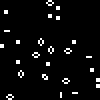

In [12]:
# g = Grid(Cell.(
#         [dead dead dead dead dead
#          dead dead alive dead dead
#          dead dead alive dead dead
#          dead dead alive dead dead
#          dead dead dead dead dead
#         ]))

g = Grid(50, 50)
for i = 1:1000
    step!(g)
    IJulia.clear_output(true)
    display(Gray.(print_grid(g)))
    sleep(0.1)
end

In [10]:
function rand_state()
    rand() > .5 ? alive : dead
end

rand_state (generic function with 1 method)